In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import collections

import sys
sys.path.append('../Tianwen')

import ccsds

plt.rcParams['figure.figsize'] = (7, 3.5)
plt.rcParams['figure.facecolor'] = 'w'

## PCM/PSK/PM telemetry

In [2]:
x = np.fromfile('im1_frames.u8', 'uint8').reshape(-1, 151)

In [3]:
aos = [ccsds.AOSPrimaryHeader.parse(a) for a in x]
scid = [a.spacecraft_id for a in aos]
vcid = np.array([a.virtual_channel_id for a in aos])
vcfc = np.array([a.virtual_channel_frame_count for a in aos])
aos[:5]

[Container(transfer_frame_version_number=1, spacecraft_id=206, virtual_channel_id=1, virtual_channel_frame_count=64141, replay_flag=False, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=206, virtual_channel_id=1, virtual_channel_frame_count=64142, replay_flag=False, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=206, virtual_channel_id=1, virtual_channel_frame_count=64143, replay_flag=False, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=206, virtual_channel_id=1, virtual_channel_frame_count=64144, replay_flag=False, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=206, virtual_channel_id=1, virtual_channel_frame_count=64145, replay_flag=False, vc_frame_count_usage_

In [4]:
collections.Counter(scid)

Counter({206: 783})

In [5]:
hex(206)

'0xce'

In [6]:
collections.Counter(vcid)

Counter({1: 783})

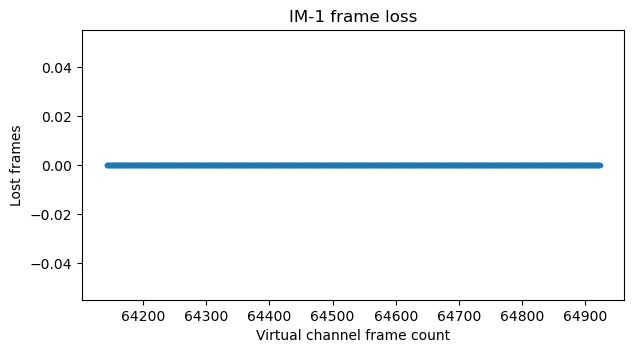

In [7]:
plt.plot(vcfc[1:], np.diff(vcfc) - 1, '.-')
plt.title('IM-1 frame loss')
plt.xlabel('Virtual channel frame count')
plt.ylabel('Lost frames');

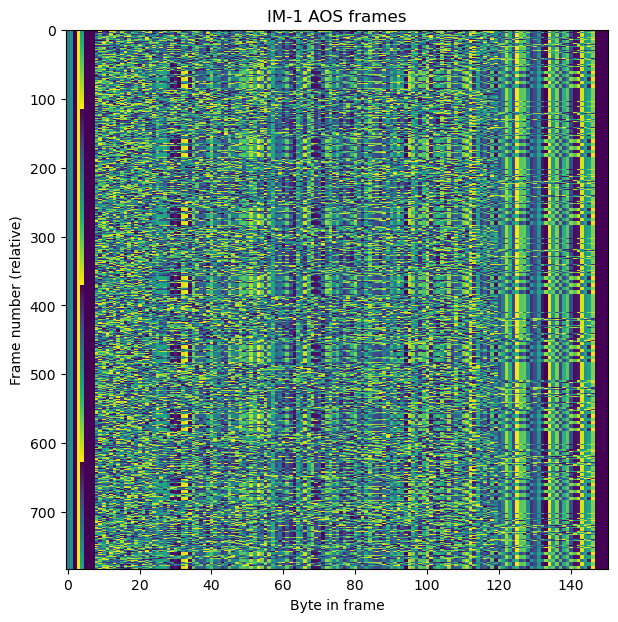

In [8]:
plt.figure(figsize=(7, 7))
plt.imshow(x, aspect='auto', interpolation='none')
plt.title('IM-1 AOS frames')
plt.xlabel('Byte in frame')
plt.ylabel('Frame number (relative)');

## Suppressed-carrier BPSK telemetry

In [9]:
x = np.fromfile('im1_bpsk_frames.u8', 'uint8').reshape(-1, 151)
aos = [ccsds.AOSPrimaryHeader.parse(a) for a in x]
scid = [a.spacecraft_id for a in aos]
vcid = np.array([a.virtual_channel_id for a in aos])
vcfc = np.array([a.virtual_channel_frame_count for a in aos])
aos[:5]

[Container(transfer_frame_version_number=1, spacecraft_id=206, virtual_channel_id=1, virtual_channel_frame_count=127537, replay_flag=False, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=206, virtual_channel_id=1, virtual_channel_frame_count=127538, replay_flag=False, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=206, virtual_channel_id=1, virtual_channel_frame_count=127539, replay_flag=False, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=206, virtual_channel_id=1, virtual_channel_frame_count=127540, replay_flag=False, vc_frame_count_usage_flag=False, rsvd_spare=0, vc_framecount_cycle=0),
 Container(transfer_frame_version_number=1, spacecraft_id=206, virtual_channel_id=1, virtual_channel_frame_count=127541, replay_flag=False, vc_frame_count_u

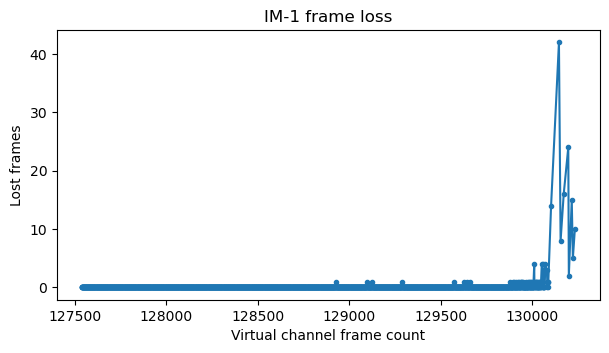

In [10]:
plt.plot(vcfc[1:], np.diff(vcfc) - 1, '.-')
plt.title('IM-1 frame loss')
plt.xlabel('Virtual channel frame count')
plt.ylabel('Lost frames');

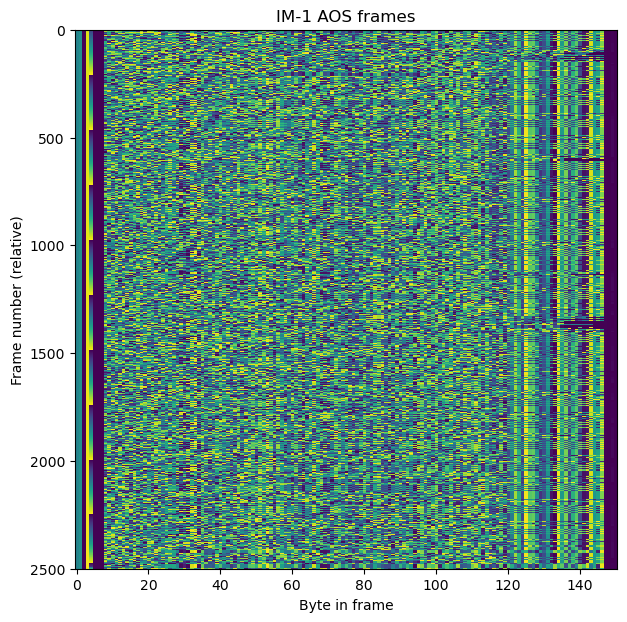

In [11]:
plt.figure(figsize=(7, 7))
plt.imshow(x, aspect='auto', interpolation='none')
plt.title('IM-1 AOS frames')
plt.xlabel('Byte in frame')
plt.ylabel('Frame number (relative)');